In [35]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [36]:
# Load the dataset
data = pd.read_csv("Clustering_Data.csv")
data.head()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,Customer_Segment
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,1
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,1
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,1
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,1
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,1


In [37]:
# Drop the 'Customer_Segment' column (if it exists)
X = data.drop(columns=['Customer_Segment'], errors='ignore')
X.head()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [38]:
# Normalize the features to ensure equal contribution to clustering
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [39]:
def initialize_centroids(X, k):
    return X[np.random.choice(X.shape[0], k, replace=False)]


In [40]:
def assign_clusters(X, centroids):
    distances = np.linalg.norm(X[:, np.newaxis] - centroids, axis=2)
    return np.argmin(distances, axis=1)

In [41]:
def update_centroids(X, labels, k):
    return np.array([X[labels == i].mean(axis=0) for i in range(k)])

In [42]:
def kmeans(X, k, max_iters=100, tol=1e-4):
    centroids = initialize_centroids(X, k)
    for _ in range(max_iters):
        labels = assign_clusters(X, centroids)
        new_centroids = update_centroids(X, labels, k)
        
        if np.linalg.norm(new_centroids - centroids) < tol:
            break
        centroids = new_centroids
    
    return labels, centroids


In [43]:
# Find optimal number of clusters using Elbow Method
distortions = []
K_range = range(2, 11)
for k in K_range:
    labels, centroids = kmeans(X_scaled, k)
    distortions.append(np.sum((X_scaled - centroids[labels]) ** 2))


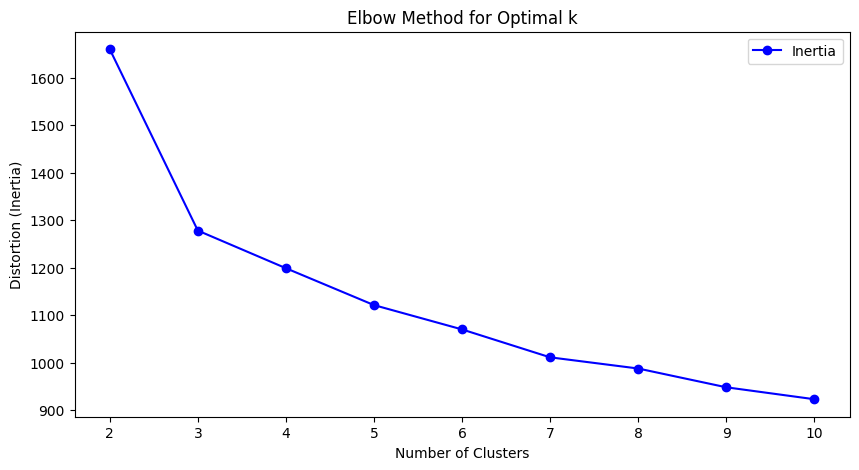

In [44]:
# Plot Elbow Method
plt.figure(figsize=(10, 5))
plt.plot(K_range, distortions, 'bo-', label='Inertia')
plt.xlabel('Number of Clusters')
plt.ylabel('Distortion (Inertia)')
plt.title('Elbow Method for Optimal k')
plt.legend()
plt.show()

In [45]:
# Fit K-means with optimal k (assuming k=3 from the elbow method)
k_optimal = 3
labels, centroids = kmeans(X_scaled, k_optimal)


In [46]:
# Print cluster centers
print("Cluster Centers:")
print(centroids)


Cluster Centers:
[[-0.93900326 -0.39196582 -0.43920097  0.20898793 -0.46377382 -0.05334831
   0.06690377 -0.01982215  0.06479192 -0.88207529  0.45298189  0.28973833
  -0.75602559]
 [ 0.87809728 -0.30457633  0.31894179 -0.66452366  0.56488825  0.87650546
   0.94363903 -0.58558981  0.58178294  0.16718842  0.48372814  0.76705349
   1.15834713]
 [ 0.16490746  0.87154706  0.18689833  0.52436746 -0.07547277 -0.97933029
  -1.21524764  0.72606354 -0.77970639  0.94153874 -1.16478865 -1.29241163
  -0.40708796]]


In [47]:
# Interpret cluster centers intuitively
print("\nIntuitive Explanation:")
for i, center in enumerate(centroids):
    print(f"Cluster {i}: Features roughly centered around {center}")


Intuitive Explanation:
Cluster 0: Features roughly centered around [-0.93900326 -0.39196582 -0.43920097  0.20898793 -0.46377382 -0.05334831
  0.06690377 -0.01982215  0.06479192 -0.88207529  0.45298189  0.28973833
 -0.75602559]
Cluster 1: Features roughly centered around [ 0.87809728 -0.30457633  0.31894179 -0.66452366  0.56488825  0.87650546
  0.94363903 -0.58558981  0.58178294  0.16718842  0.48372814  0.76705349
  1.15834713]
Cluster 2: Features roughly centered around [ 0.16490746  0.87154706  0.18689833  0.52436746 -0.07547277 -0.97933029
 -1.21524764  0.72606354 -0.77970639  0.94153874 -1.16478865 -1.29241163
 -0.40708796]


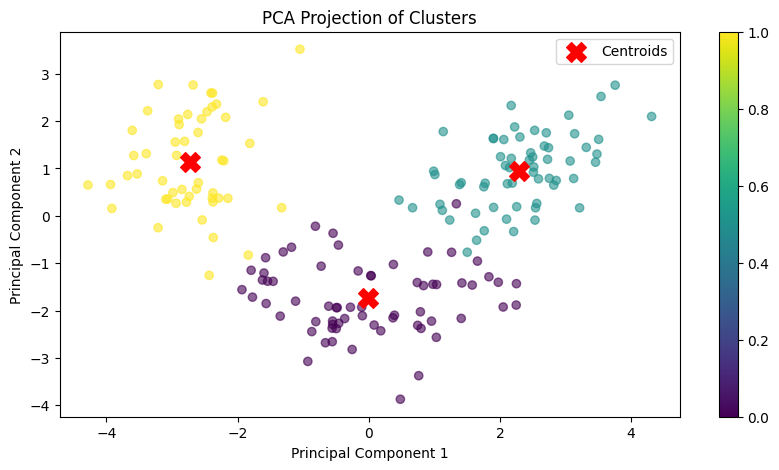

In [48]:
# PCA Visualization
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)
plt.figure(figsize=(10, 5))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels, cmap='viridis', alpha=0.6)
plt.scatter(pca.transform(centroids)[:, 0], pca.transform(centroids)[:, 1], c='red', marker='X', s=200, label='Centroids')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA Projection of Clusters')
plt.colorbar()
plt.legend()
plt.show()
